# PROYECTO: Dr. Semmelweis and the Discovery of Handwashing
_Reanalice los datos detrás de uno de los descubrimientos más importantes de la medicina moderna: el lavado de manos._

> ****

**Project Description**
> En 1847, el médico húngaro Ignaz Semmelweis hizo un descubrimiento revolucionario: descubre el lavado de manos. Las manos contaminadas fueron una de las principales causas de la fiebre puerperal y, al obligarle a lavarse las manos en su hospital, salvó cientos de vidas.



> ***

**Project Tasks**
1. Meet Dr. Ignaz Semmelweis
2. The alarming number of deaths
3. Death at the clinics
4. The handwashing begins
5. The effect of handwashing
6. The effect of handwashing highlighted
7. More handwashing, fewer deaths?
8. A Bootstrap analysis of Semmelweis handwashing data
9. The fate of Dr. Semmelweis

---

## 1. Meet Dr. Ignaz Semmelweis

**(Conozca al Dr. Ignaz Semmelweis)**

<p>
<img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/datasets/ignaz_semmelweis_1860.jpeg">
</p>

Este es el Dr. Ignaz Semmelweis, un médico húngaro nacido en 1818 y activo en el Hospital General de Viena. Si el Dr. Semmelweis parece preocupado es probablemente porque está pensando en la fiebre puerperal: una enfermedad mortal que afecta a las mujeres que acaban de dar a luz. Está pensando en ello porque a principios de la década de 1840 en el Hospital General de Viena hasta el 10% de las mujeres que dan a luz mueren a causa de él. Lo está pensando porque conoce la causa de la fiebre puerperal: son las manos contaminadas de los médicos que dan a luz a los bebés. ¡Y no lo escucharán ni se lavarán las manos!

En este cuaderno, vamos a volver a analizar los datos que hicieron que Semmelweis descubriera la importancia del lavado de manos. Comencemos por mirar los datos que hicieron que Semmelweis se diera cuenta de que algo andaba mal con los procedimientos en el Hospital General de Viena

In [22]:
# Importando modulos
import pandas as pd
import numpy as np

# Cargando la data
yearly = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/dc_project_analyzing_discovery_of_handwashing_with_python/main/datasets/yearly_deaths_by_clinic.csv')
# yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

# Imprimir el dataframe
yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [23]:
yearly.shape

(12, 4)

## 2. The alarming number of deaths

**(El alarmante número de muertes)**

La tabla anterior muestra el número de mujeres que dieron a luz en las dos clínicas del Hospital General de Viena durante los años 1841 a 1846. Notará que dar a luz era muy peligroso; un número alarmante de mujeres murió como resultado del parto, la mayoría de ellas por fiebre puerperal.

Vemos esto con mayor claridad si observamos la proporción de muertes con respecto al número de mujeres que dan a luz. Acerquémonos a la proporción de muertes en la Clínica 1.

In [24]:
# Calcule la proporción de muertes por # de nacimientos
yearly['proportion_deaths'] = yearly['deaths']/ yearly['births']

# Extraiga los datos de la Clínica 1 en clinic_1 y los datos de la Clínica 2 en clinic_2
clinic_1 = yearly[yearly['clinic'] == 'clinic 1']
clinic_2 = yearly[yearly['clinic'] == 'clinic 2']

# Imprimir clinic_1
print(clinic_1)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464


In [25]:
clinic_1.shape
# clinic_2.shape

(6, 5)

## 3. Death at the clinics
**(Muerte en las clínicas)**

Si ahora graficamos la proporción de muertes tanto en la Clínica 1 como en la Clínica 2, veremos un patrón curioso.


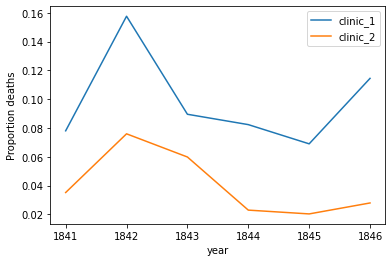

In [26]:
# Esto hace que las tramas aparezcan en el cuaderno.
%matplotlib inline

# Trazar la proporción anual de muertes en las dos clínicas
ax = clinic_1.plot(x="year", y="proportion_deaths", label="clinic_1")
clinic_2.plot(x="year", y="proportion_deaths",label="clinic_2", 
              ax=ax, ylabel="Proportion deaths")

## 4. The handwashing begins

**(Comienza el lavado de manos)**

¿Por qué la proporción de muertes es constantemente mucho más alta en la Clínica 1? Semmelweis vio el mismo patrón y estaba desconcertado y angustiado. La única diferencia entre las clínicas era que muchos estudiantes de medicina trabajaban en la Clínica 1, mientras que la mayoría de las parteras trabajaban en la Clínica 2. Mientras que las parteras solo atendían a las mujeres que daban a luz, las estudiantes de medicina también pasaban tiempo en las salas de autopsias examinando cadáveres.

Semmelweis comenzó a sospechar que algo en los cadáveres se extendió de las manos de los estudiantes de medicina y causó fiebre puerperal. Entonces, en un intento desesperado por detener las altas tasas de mortalidad, decretó: ¡Lávese las manos! Esta fue una solicitud poco ortodoxa y controvertida, nadie en Viena sabía sobre las bacterias en este momento.

Carguemos los datos mensuales de la Clínica 1 para ver si el lavado de manos tuvo algún efecto.


In [27]:
# Leer datasets/month_deaths.csv y guardarlo en monthly
monthly = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/dc_project_analyzing_discovery_of_handwashing_with_python/main/datasets/monthly_deaths.csv',
                      parse_dates=["date"])

# Calcule la proporción de muertes por no. nacimientos
monthly["proportion_deaths"] = monthly['deaths']/ monthly['births']

# Imprima las primeras filas mensualmente
print(monthly.head())

        date  births  deaths  proportion_deaths
0 1841-01-01     254      37           0.145669
1 1841-02-01     239      18           0.075314
2 1841-03-01     277      12           0.043321
3 1841-04-01     255       4           0.015686
4 1841-05-01     255       2           0.007843


In [28]:
monthly.shape

(98, 4)

## 5. The effect of handwashing

**(El efecto del lavado de manos)**

Con los datos cargados, ahora podemos ver la proporción de muertes a lo largo del tiempo. En la siguiente gráfica no hemos marcado dónde comenzó el lavado de manos obligatorio, ¡pero redujo la proporción de muertes a tal grado que debería poder detectarlo!

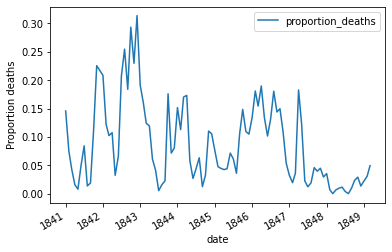

In [29]:
# Plot monthly proportion of deaths date
ax = monthly.plot(x="date", y="proportion_deaths", ylabel="Proportion deaths")

## 6. The effect of handwashing highlighted
**(El efecto del lavado de manos destacado)**

A partir del verano de 1847 la proporción de muertes se reduce drásticamente y, sí, fue entonces cuando Semmelweis hizo obligatorio el lavado de manos.

El efecto del lavado de manos se hace aún más claro si lo resaltamos en el gráfico.

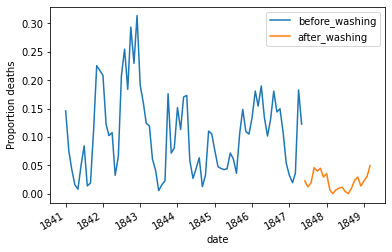

In [30]:
# Fecha en que se hizo obligatorio el lavado de manos
handwashing_start = pd.to_datetime('1847-06-01')

# Dividir mensualmente en antes y después de handwashing_start
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]

# Trazar la proporción mensual de muertes antes y después del lavado de manos
ax = before_washing.plot(x="date", y="proportion_deaths", label="before_washing")
after_washing.plot(x="date", y="proportion_deaths",label="after_washing", 
              ax=ax, ylabel="Proportion deaths")

## 7. More handwashing, fewer deaths?
<p>Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on average?</p>

In [31]:
# Diferencia en la proporción media mensual de muertes por lavado de manos
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = np.mean(after_proportion) - np.mean(before_proportion)
mean_diff

-0.0839566075118334

## 8. A Bootstrap analysis of Semmelweis handwashing data
**(Un análisis Bootstrap de los datos de lavado de manos de Semmelweis)**

¡Redujo la proporción de muertes en alrededor de 8 puntos porcentuales! De un 10% en promedio a solo un 2% (que sigue siendo un número elevado para los estándares modernos).

Para tener una idea de la incertidumbre en torno a la cantidad de lavado de manos que reduce la mortalidad, podríamos mirar un intervalo de confianza (aquí calculado utilizando el método bootstrap).

----
Un análisis bootstrap es una forma rápida de obtener la incertidumbre de una estimación; en su caso, la estimación es la diferencia media que calculó en 7. Un análisis bootstrap funciona simulando rehacer la recopilación de datos extrayendo aleatoriamente de los datos y permitiendo un valor para ser dibujado muchas veces

In [34]:
# Un análisis inicial de la reducción de muertes por lavado de manos
boot_mean_diff = []
for i in range(3000):
    boot_before =before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( np.mean(boot_after) - np.mean(boot_before) )

# Calcular un intervalo de confianza del 95% a partir de boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.100936
0.975   -0.067238
dtype: float64

## 9. The fate of Dr. Semmelweis
Por tanto, el lavado de manos redujo la proporción de muertes entre 6,7 y 10 puntos porcentuales, según un intervalo de confianza del 95%. Con todo, parecería que Semmelweis tenía pruebas sólidas de que lavarse las manos era un procedimiento simple pero muy eficaz que podía salvar muchas vidas.

La tragedia es que, a pesar de la evidencia, la teoría de Semmelweis - que la fiebre puerperal fue causada por alguna "sustancia" (lo que hoy conocemos como bacteria) de los cadáveres de la sala de autopsias - fue ridiculizada por científicos contemporáneos. La comunidad médica rechazó en gran medida su descubrimiento y en 1849 se vio obligado a abandonar definitivamente el Hospital General de Viena.

Una razón de esto fue que las estadísticas y los argumentos estadísticos eran poco comunes en la ciencia médica en el siglo XIX. Semmelweis solo publicó sus datos como largas tablas de datos brutos, pero no mostró gráficos ni intervalos de confianza. Si hubiera tenido acceso al análisis que acabamos de preparar, podría haber tenido más éxito en lograr que los médicos vieneses se lavaran las manos.

In [37]:
#Dados los datos que recopiló Semmelweis,
# ¿es cierto o falso que los médicos deban lavarse las manos?



doctors_should_wash_their_hands = True